# Dissimilarity Distance Measures
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [dissimilarity_measures.ipynb](https://github.com/diegoinacio/computer-vision-notebooks/blob/master/Mathematical-Foundations/dissimilarity_measures.ipynb)

In [1]:
%matplotlib inline
import numpy as np

In [2]:
from dissimilarity__utils import *

## 1. Euclidian Distance
---

In [3]:
eucl = lambda x, y: np.sum((x - y)**2, axis=1)**0.5

In [4]:
x = np.array([0, 0])
dA = eucl(x, yA)
dB = eucl(x, yB).reshape(s.shape)

Wall time: 122 ms


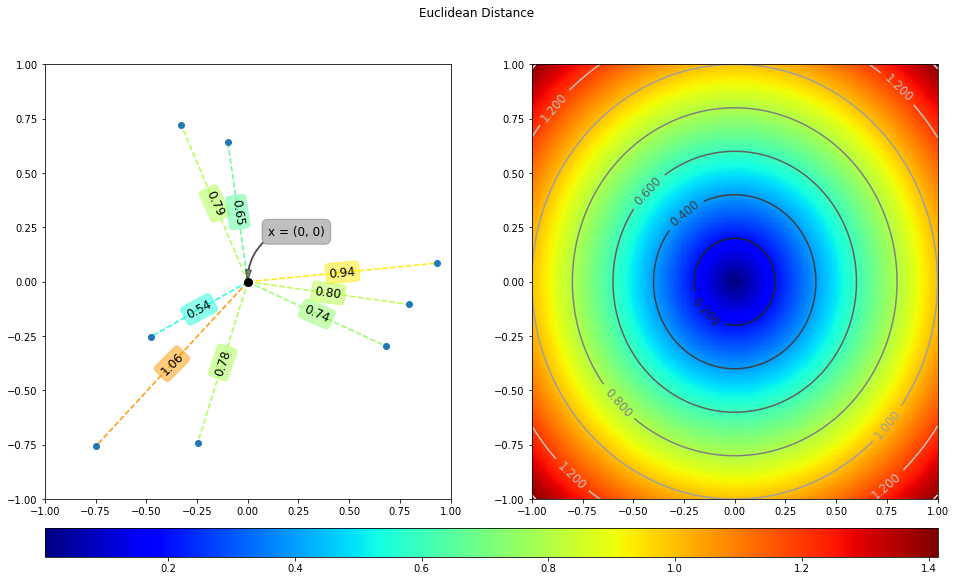

In [5]:
%%time
plotDist(x, dA, dB, 'euclidean_distance', save=False)

## 2. Manhattan Distance
---

In [6]:
manh = lambda x, y: np.sum(np.absolute(x - y), axis = 1)

In [7]:
x = np.array([0, 0])
dA = manh(x, yA)
dB = manh(x, yB).reshape(s.shape)

Wall time: 146 ms


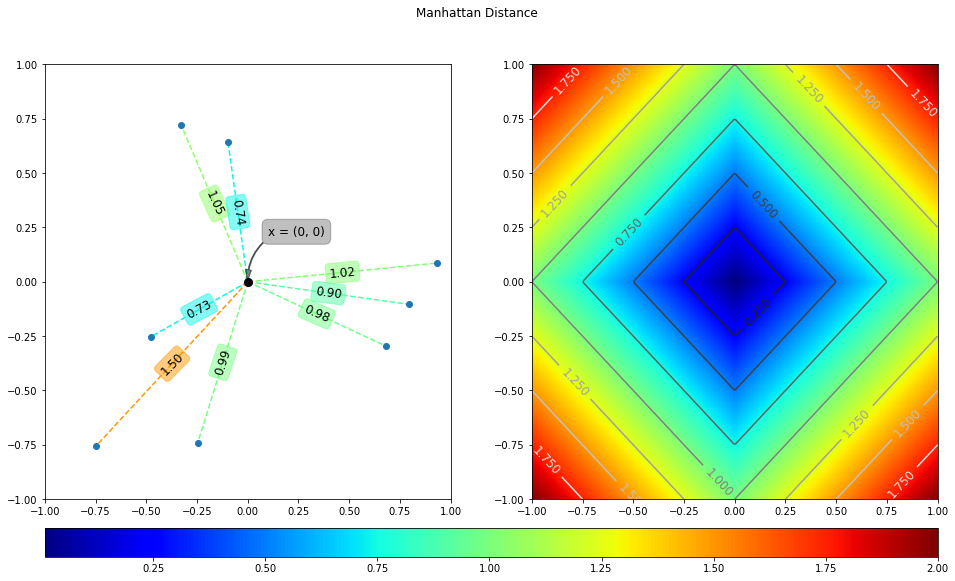

In [8]:
%%time
plotDist(x, dA, dB, 'manhattan_distance', save=False)

## 3. Chebyshev Distance
---

In [9]:
cheb = lambda x, y: np.max(np.absolute(x - y), axis = 1)

In [10]:
x = np.array([0, 0])
dA = cheb(x, yA)
dB = cheb(x, yB).reshape(s.shape)

Wall time: 114 ms


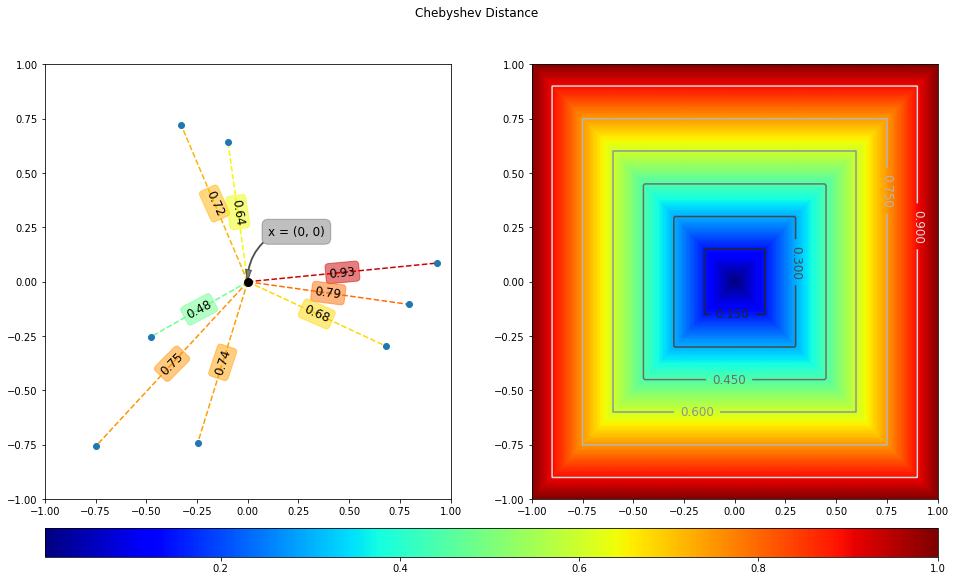

In [11]:
%%time
plotDist(x, dA, dB, 'chebyshev_distance', save=False)

## 4. Minkowski Distance
---

In [12]:
mink = lambda x, y, p: np.sum(np.absolute(x - y)**p, axis = 1)**(1/p)

In [13]:
x = np.array([0, 0])
p = 2**-1
dA = mink(x, yA, p)
dB = mink(x, yB, p).reshape(s.shape)

Wall time: 120 ms


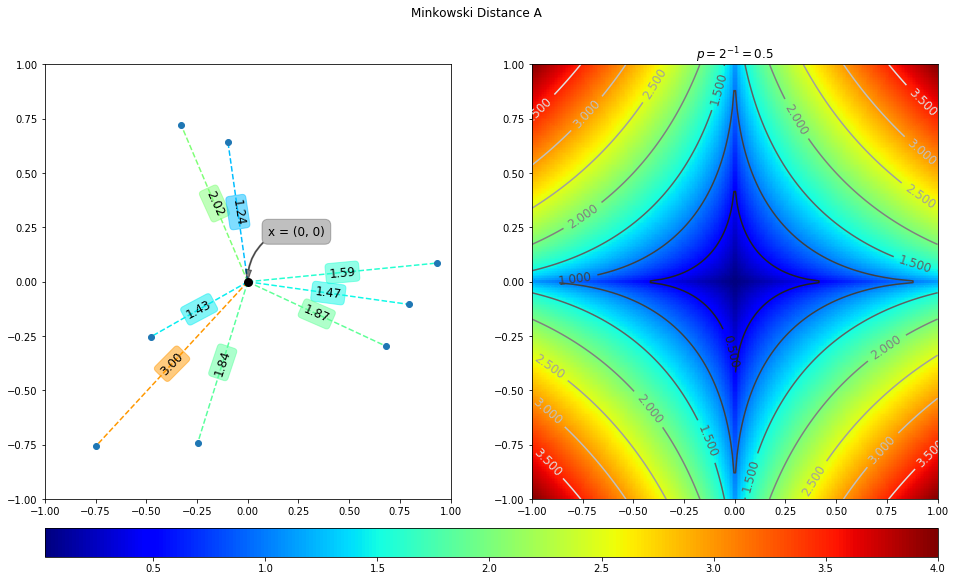

In [14]:
%%time
plotDist(x, dA, dB, 'minkowski_distance_A', ctitle=r'$p=2^{0}{2}{1}={3}$'.format('{', '}', -1, p), save=False)

Wall time: 576 ms


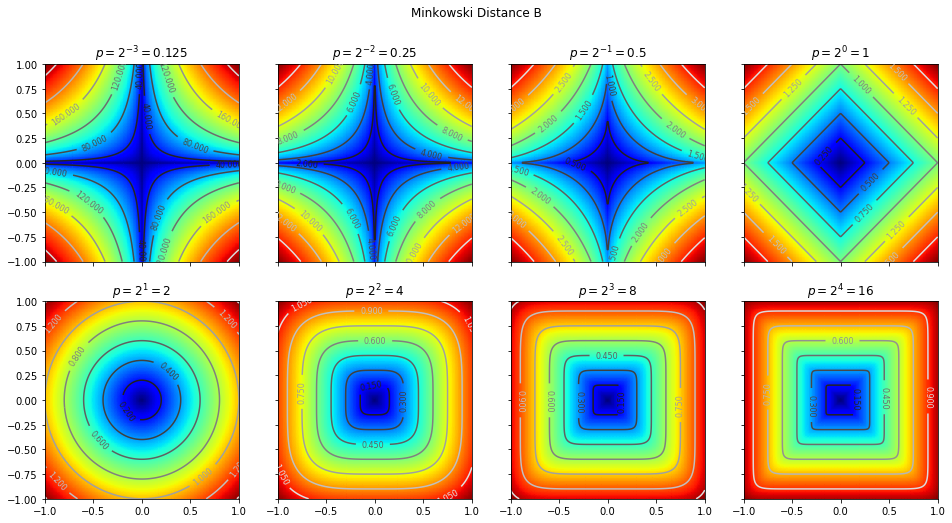

In [15]:
%%time
fig, axes = plt.subplots(2, 4, sharex=True, sharey=True)

for j, axs in enumerate(axes):
    for i, ax in enumerate(axs):
        index = i + 4*j
        exp = index - 3
        pi = 2**exp
        d = mink(x, yB, pi).reshape(s.shape)
        plotContour(ax, d,
                    r'$p=2^{0}{2}{1}={3}$'.format('{', '}', exp, pi),
                    fsize=8)
figname = 'minkowski_distance_B'
fig.suptitle(' '.join([e.capitalize() for e in figname.split('_')]))
#fig.savefig('_output/similarity_{}.png'.format(figname), bbox_inches='tight')

## 5. Canberra Distance
---

In [16]:
def canb(x, y):
    num = np.absolute(x - y)
    den = np.absolute(x) + np.absolute(y)
    return np.sum(num/den, axis = 1)

In [17]:
x = np.array([0.25, 0.25])
dA = canb(x, yA)
dB = canb(x, yB).reshape(s.shape)

Wall time: 106 ms


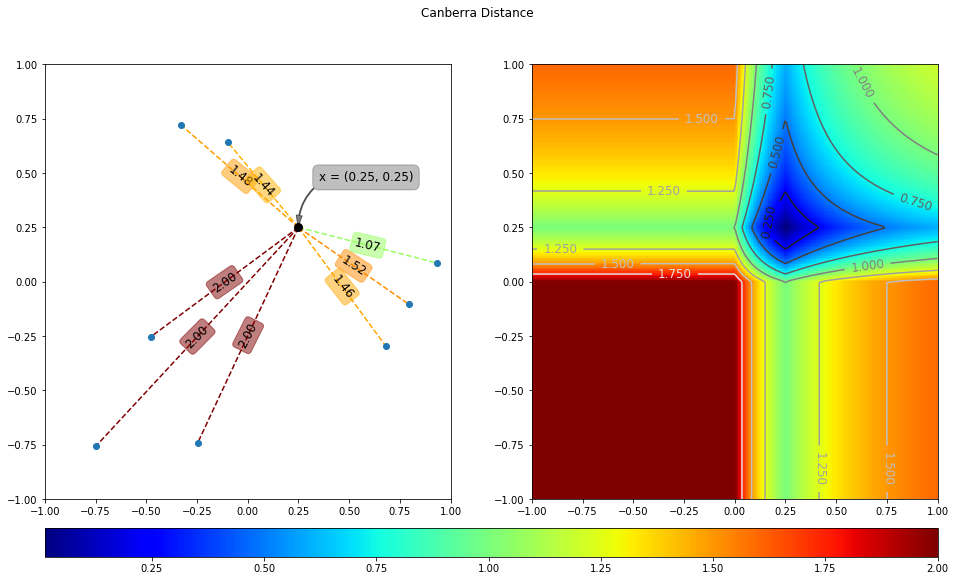

In [18]:
%%time
plotDist(x, dA, dB, 'canberra_distance', save=False)

## 6. Cosine Distance
---

In [19]:
def coss(x, y):
    if x.ndim == 1:
        x = x[np.newaxis]
    num = np.sum(x*y, axis=1)
    den = np.sum(x**2, axis = 1)**0.5
    den = den*np.sum(y**2, axis = 1)**0.5
    return 1 - num/den

In [20]:
x = np.array([1e-7, 1e-7])
dA = coss(x, yA)
dB = coss(x, yB).reshape(s.shape)

Wall time: 109 ms


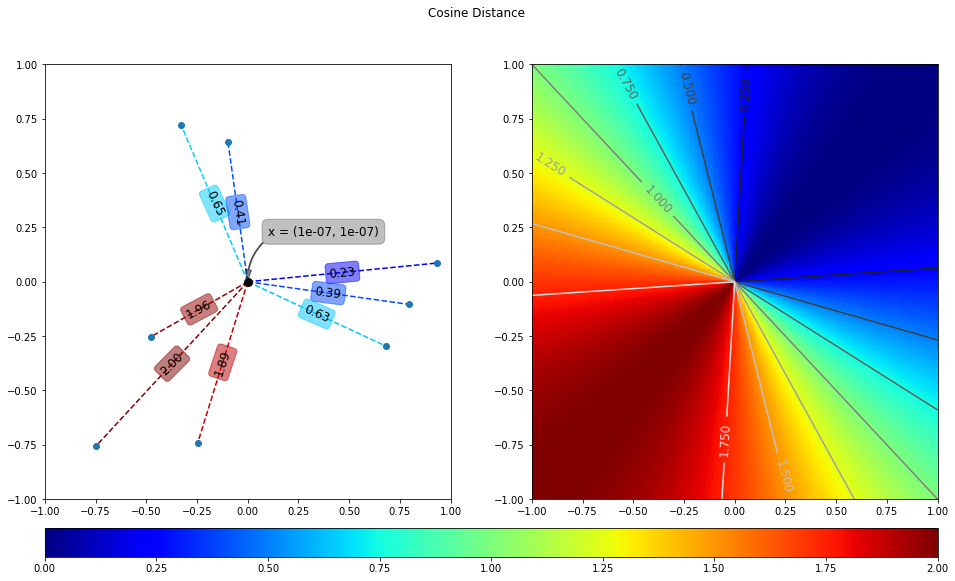

In [21]:
%%time
plotDist(x, dA, dB, 'cosine_distance', save=False)

## 7. Hamming Distance
---

In [22]:
def hamm(x, y):
    lmax = max(len(x), len(y))
    x, y = x.ljust(lmax), y.rjust(lmax)
    return sum([a != b for a, b in zip(x, y)])

In [23]:
prec = 16
x = np.array([0, 0])
X = ieee754_realBin(x[0], n=prec) + ieee754_realBin(x[1], n=prec)
YA = np.vectorize(ieee754_realBin)(yA, n=prec)
YA = np.vectorize(lambda a, b: a + b)(YA[:,0], YA[:,1])
dA = np.vectorize(hamm)(X, YA)

YB = np.vectorize(ieee754_realBin)(yB, n=prec)
YB = np.vectorize(lambda a, b: a + b)(YB[:,0], YB[:,1])
dB = np.vectorize(hamm)(X, YB)
dB = dB.reshape(256, 256)

Wall time: 441 ms


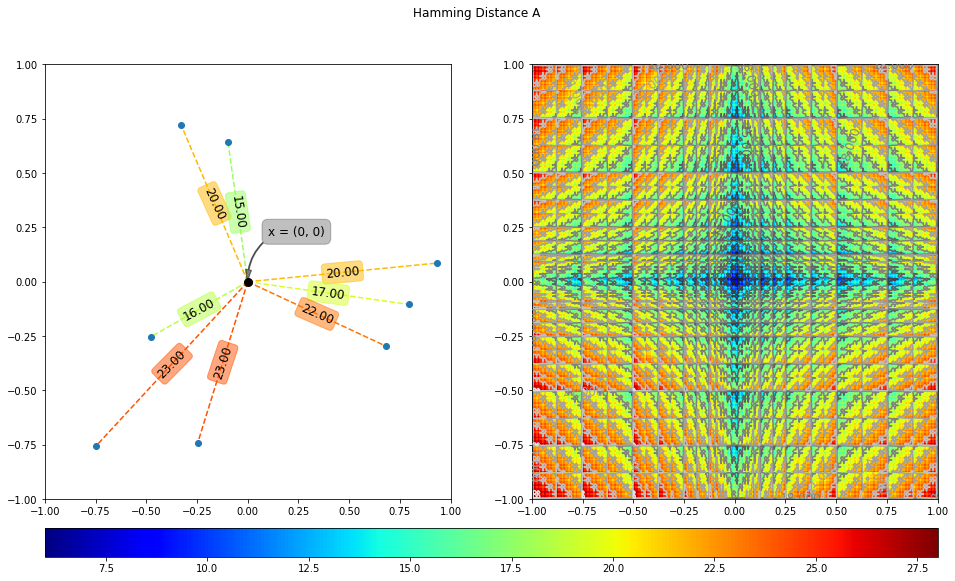

In [24]:
%%time
plotDist(x, dA, dB, 'hamming_distance_A', save=False)

In [25]:
x = 'Lampião'
yT = clni.split()
dT = {pal:hamm(x, pal) for pal in yT}

Wall time: 242 ms


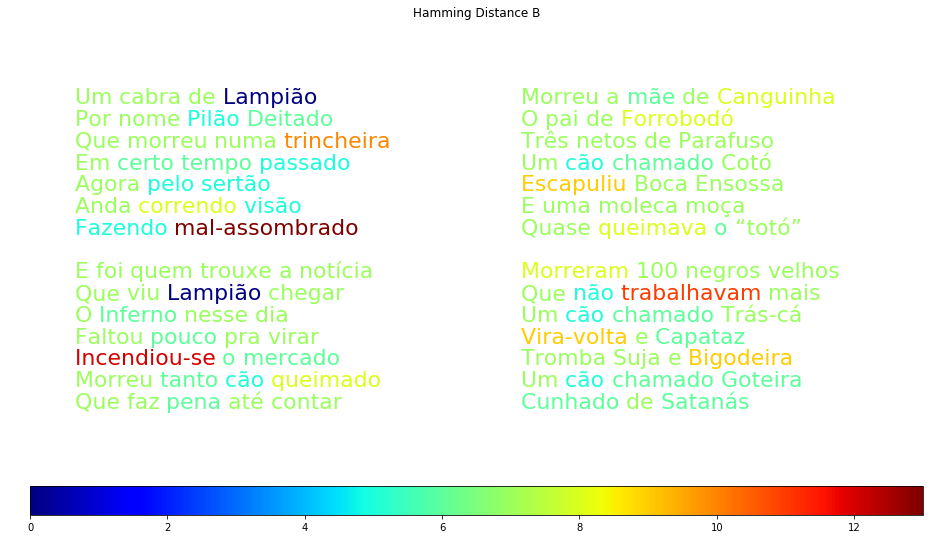

In [26]:
%%time
plotText(x, clni, dT, 'hamming_distance_B', save=False)